# Part 6.2 - Analysis for Training Set
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 120)
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
sns.axes_style("darkgrid")
%matplotlib inline

In [2]:
def filter_topics(df, topic_lsit):
    # remove data out of df if topic is not in topic_list
    return (df[df['topic'].isin(topic_list)].sort_values(by='topic', ascending=True))

In [3]:
def plot_topics(df, kind='', adjust_top=0.97, title='', height=4, col_wrap=2):
    if kind == 'scatter':
        g = sns.catplot(x="year", y='weight', hue="topic", col='keywords', col_wrap=col_wrap, 
                    kind='strip', height=height, aspect=2, jitter=1, dodge=False, s=5, legend=False,
                    data=df)
        g.fig.suptitle("Dominant Topics Distribution of {} Over Year".format(title), fontsize=16)
        
    elif kind == 'bar':
        g = sns.catplot(x="year", hue="topic", col='keywords', col_wrap=col_wrap, 
                    kind='count', height=height, aspect=2, dodge=False, legend=False, 
                    data=df)
        g.fig.suptitle("Dominant Topics Count of {} Over Year".format(title), fontsize=16)
        
    elif kind == 'point':
        g = sns.catplot(x="year", y='weight',  col='keywords', col_wrap=col_wrap, 
                    kind='point', height=height, aspect=2, dodge=False, s=1, legend=False, 
                    data=df)
        g.fig.suptitle("Average Weight of {} Over Year".format(title), fontsize=16)
        
    else:
        print('wrong kind.')
        
    g.fig.subplots_adjust(top=adjust_top)
    g.set_xticklabels(rotation=90, step=2)
    return g

**For computing resource limitation, we did not train the full dataset, but trained a random sampling dataset (train set). In this part, we will use the topic modeling result from part 6.1 to analysis the training set.** 

**To evaluate and compare the distribution of topics, we use two different metrics:**
1. The dominant topics count. 

    Every document has a dominant topic represent the most portion of its contents. By summing the number of dominant topics in a range of time, we see the variety and trend of the topic over time. It is easy to understand and fit for scatter plot, but it magnify the dominant topics weight in the document, and the count cannot reflect the weight in the time unit (year, month, etc.).

1. The dominant topics weight. 

    To reflect the weight in the time unit, we devide the count with total document number in the time unit, then the number is the dominant topics weight over time.
    
    
1. The average topic weights.

    This metric is the average weight of a topic through all documents in a range of time, it avoid the issue of distortion, but it also less significance which appear flat on plots.

## 1 Load dataframes

**Load the the dataframes:**
* `topicKeys.txt`: topic words list
* `domTopic.csv`: document dominant topics dataframe
* `avgWeight.csv`: average topic weight dataframe

**Topics List:**

In [4]:
path = r'../models/train/topicKeys.txt'

df_topics = pd.read_table(path, 
                          header=None, 
                          index_col=None, 
                          names = ['topic_', 'weight_', 'keywords'],
                          encoding='utf8').sort_values(by='topic_').reset_index(drop=True)

topics_shape = df_topics.shape

In [5]:
print('Shape of dataframe:', topics_shape)
df_topics.head(5)

Shape of dataframe: (200, 3)


,topic_,weight_,keywords
0,0,0.00521,sale auction land property section lot sell sections acres public block instructions estate street auctioneers front...
1,1,0.00335,printing prizes cards prize horse tickets office drawing books divided forms programmes advertisements stamps column...
2,2,0.00631,seeds seed grass manure clover potatoes special manures oats turnip white red cocksfoot rape ton garden sacks stock ...
3,3,0.00710,company miss theatre opera night evening house performance audience stage play season part comedy success great ente...
4,4,0.01504,man life men people great work good world time young make things fact human mind women nature years knowledge social


**Docmument - dominant topics dataframe:**

In [6]:
path = r'../models/train/domTopics.csv'

df_domtopic = pd.read_csv(path, 
                          header=None, 
                          index_col=None, 
                          names = ['id', 'region', 'year', 'topic', 'weight', 'keywords'],
                          dtype={2:'str'},
                          encoding='utf8').sort_values(by='id').reset_index(drop=True)

In [7]:
print('Shape of dataframe:', df_domtopic.shape)
df_domtopic.head(5)

Shape of dataframe: (603629, 6)


,id,region,year,topic,weight,keywords
0,1854215,Auckland,1862,176,0.375211,advertisements office paper published column post times news notice new_zealand subscribers advertising insertion pu...
1,1854233,Auckland,1863,167,0.395599,business public orders street notice general begs stock attention premises made inform advertisements goods prices p...
2,1854245,Auckland,1863,76,0.276675,apply freight passage passengers new_zealand steam company wellington london agents tons shipping leave melbourne li...
3,1854253,Auckland,1863,14,0.280050,act person regulations made time persons section part exceeding land provisions law provided liable property payment...
4,1854264,Auckland,1863,188,0.263871,estate creditors public trustee bankruptcy day notice office trust bankrupt court accounts paid business debts act t...


**Average topic weight dataframe:**

In [8]:
path = r'../models/train/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))

In [9]:
print('Shape of dataframe:', df_avgweight.shape)
df_avgweight.head(5)

Shape of dataframe: (20800, 4)


,year,topic,weight,keywords
0,1839,0,0.000018,sale auction land property section lot sell sections acres public block instructions estate street auctioneers front...
1,1839,1,0.000011,printing prizes cards prize horse tickets office drawing books divided forms programmes advertisements stamps column...
2,1839,2,0.000021,seeds seed grass manure clover potatoes special manures oats turnip white red cocksfoot rape ton garden sacks stock ...
3,1839,3,0.000024,company miss theatre opera night evening house performance audience stage play season part comedy success great ente...
4,1839,4,0.000051,man life men people great work good world time young make things fact human mind women nature years knowledge social


## 2 The Most Frequent Topics

**The most frequent topics appeared the most in the corpus, it is not necessarily the most count of dominant topics, but the highest total weight of topics, shown as below:**

In [10]:
df_topics.sort_values(by='weight_', ascending=False).head(10)

,topic_,weight_,keywords
60,60,0.04135,association press received telegraph copyright london united electric cable july sydney april june march august aust...
45,45,0.03855,tie ths ill day tin time ton zealand end tht ail aid hat thai oil tiie land ter son column
149,149,0.02996,time good year made work great present fact week day make years place long past days number doubt ago position
152,152,0.01999,mrs miss messrs smith misses wilson brown williams jones taylor john james campbell anderson martin thompson scott c...
185,185,0.01933,sydney south melbourne australia australian wales received new_zealand victoria queensland adelaide government news ...
103,103,0.01892,letter sir editor public made paper time matter statement fact correspondent give make letters published times quest...
167,167,0.01825,business public orders street notice general begs stock attention premises made inform advertisements goods prices p...
100,100,0.01713,matter question thought made time opinion present asked position put make give case considered fact people regard su...
174,174,0.01653,man good don't time day make asked put young back boy thing it's told people give home things i'm men
10,10,0.01607,association meeting wellington conference auckland new_zealand union committee council decided held press resolution...


**Generate dominant topics dataframe for plot:**

In [57]:
topic_list = df_topics.sort_values(by='weight_', ascending=False).topic_[:10].tolist()

df_plt = filter_topics(df_domtopic, topic_list)

df_plt.keywords = df_plt.keywords.str.slice(0,60)+'...'

print('Shape of dataframe:', df_plt.shape)
df_plt.sample(5)

Shape of dataframe: (53636, 6)


,id,region,year,topic,weight,keywords
252055,13688813,Taranaki,1903,185,0.353908,sydney south melbourne australia australian wales received n...
327114,17100802,Wellington,1918,185,0.524064,sydney south melbourne australia australian wales received n...
313881,16633991,Waikato,1920,10,0.366842,association meeting wellington conference auckland new_zeala...
44291,3627372,Manawatu-Wanganui,1893,167,0.605629,business public orders street notice general begs stock atte...
557427,28639154,Auckland,1901,149,0.374216,time good year made work great present fact week day make ye...


**Dominant topics distribution over year:**

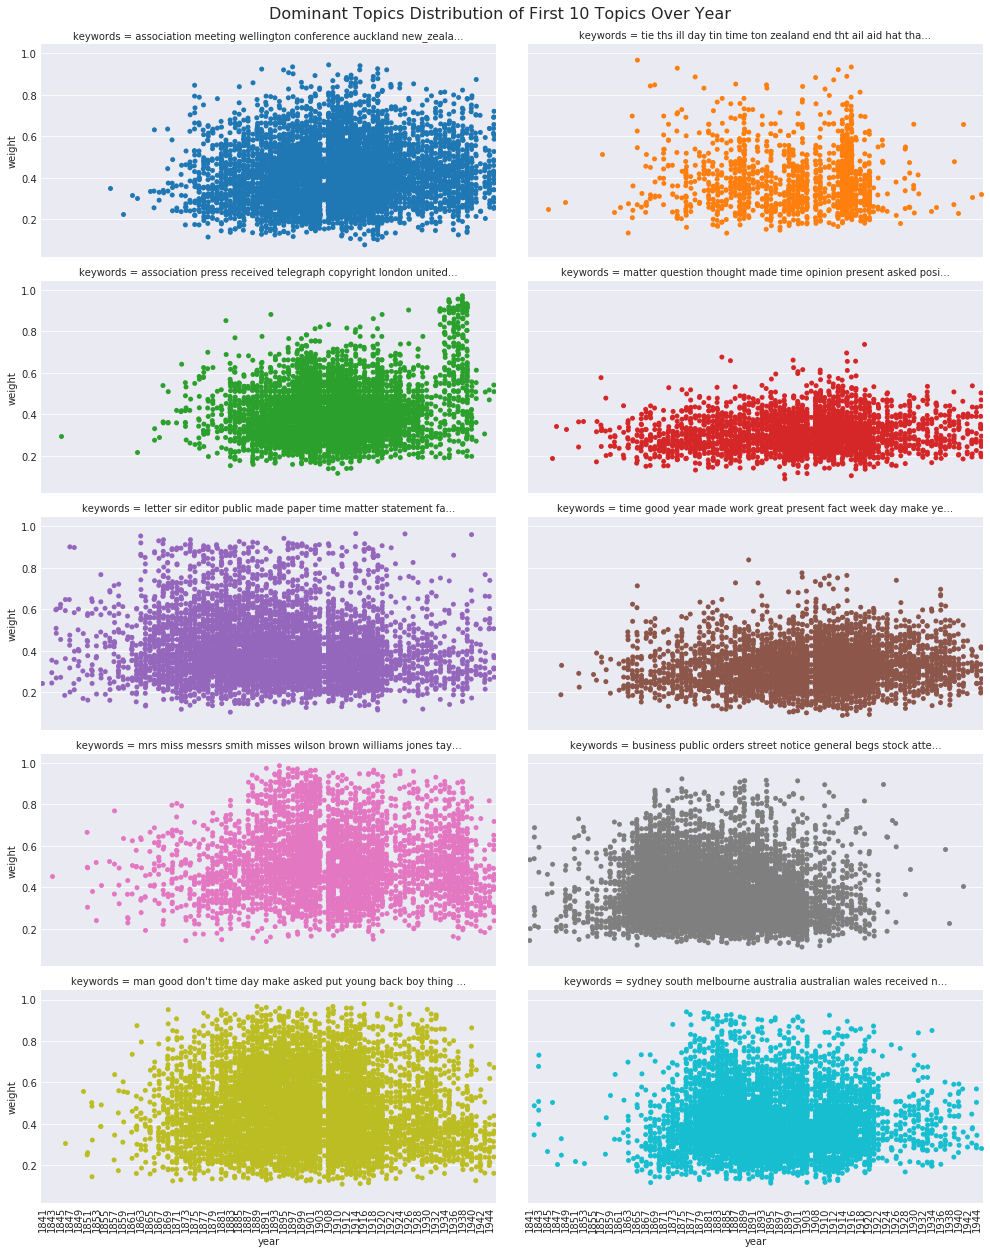

In [56]:
plot_topics(df_plt, 
            'scatter', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

**Show first 10 topics and the number of its dominant topics:**

In [14]:
# show first 10 topics, keywords and count number
df_domtopic.groupby(['topic', 'keywords']).size().reset_index(name='count').sort_values('count', ascending=False)[:10]

,topic,keywords,count
33,33,death found man body deceased named accident died inquest morning association hospital years dead yesterday press ag...,11056
98,98,french london government paris british france received foreign troops russia turkish russian turkey constantinople w...,10355
132,132,german germany received berlin war london germans russia russian states government correspondent kaiser cable britis...,9551
8,8,cough advertisements column colds cure remedy cold coughs advt bottle throat great woods lung peppermint nazol baxte...,8536
36,36,enemy german germans front french london british fighting attack troops captured received line artillery russian att...,8304
102,102,column advertisements free good street wellington made make suit write quality price buy money prices give time send...,8090
65,65,court charged charge accused fined guilty police imprisonment case months sentenced years pleaded sentence costs sup...,8077
167,167,business public orders street notice general begs stock attention premises made inform advertisements goods prices p...,7991
112,112,wellington arrived morning sailed auckland port yesterday left passengers to-day tons nelson lyttelton to-morrow coa...,7523
174,174,man good don't time day make asked put young back boy thing it's told people give home things i'm men,7493


**Filter the dominant topics dataframe of first 10 topics:**

In [8]:
topics10 = range(10)
df_topics10 = filter_topics(df_domtopic, range(10))

print('Shape of dataframe:', df_topics10.shape)
df_topics10.sample(5)

Shape of dataframe: (7523, 6)


,id,region,year,topic,weight,keywords
137653,27029536,Northland,1916,0,0.360972,mr party government minister labour sir ward j...
79847,16076106,Manawatu-Wanganui,1909,3,0.465505,man people men public law good fact make thing...
73516,15113820,West Coast,1911,5,0.285155,good time year made week great work present da...
52111,10973599,Otago,1895,5,0.189726,good time year made week great work present da...
67089,13619587,Taranaki,1903,5,0.234135,good time year made week great work present da...


**Filter the topic average weight dataframe for first 10 topics:**

In [9]:
df_avgw10 = filter_topics(df_avgweight, topics10)

print('Shape of dataframe:', df_avgw10.shape)
df_avgw10.sample(5)

Shape of dataframe: (1030, 4)


,year,topic,weight,keywords
6007,1864,7,0.005004,hotel proprietor accommodation spirits wines p...
5506,1862,6,0.003857,napier hastings bay hawke waipawa dannevirke w...
5002,1860,2,0.019352,company apply freight steam passage zealand pa...
16259,1908,9,0.004316,young man father lady wife years woman life gi...
13009,1892,9,0.006346,young man father lady wife years woman life gi...


**Dominant topics distribution:**

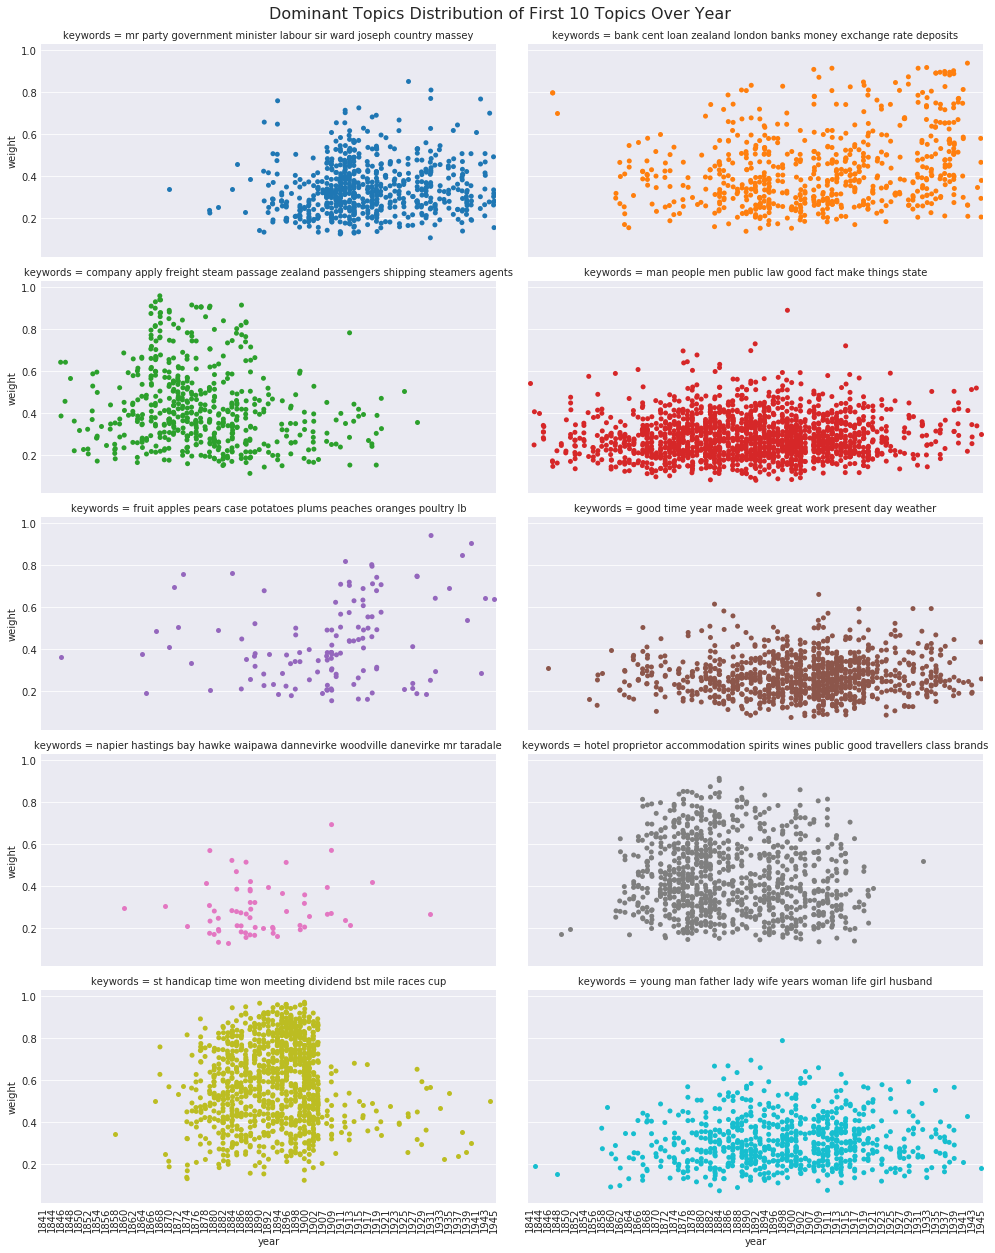

In [10]:
plot_topics(df_topics10, 
            'scatter', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

**Dominant topics count:**

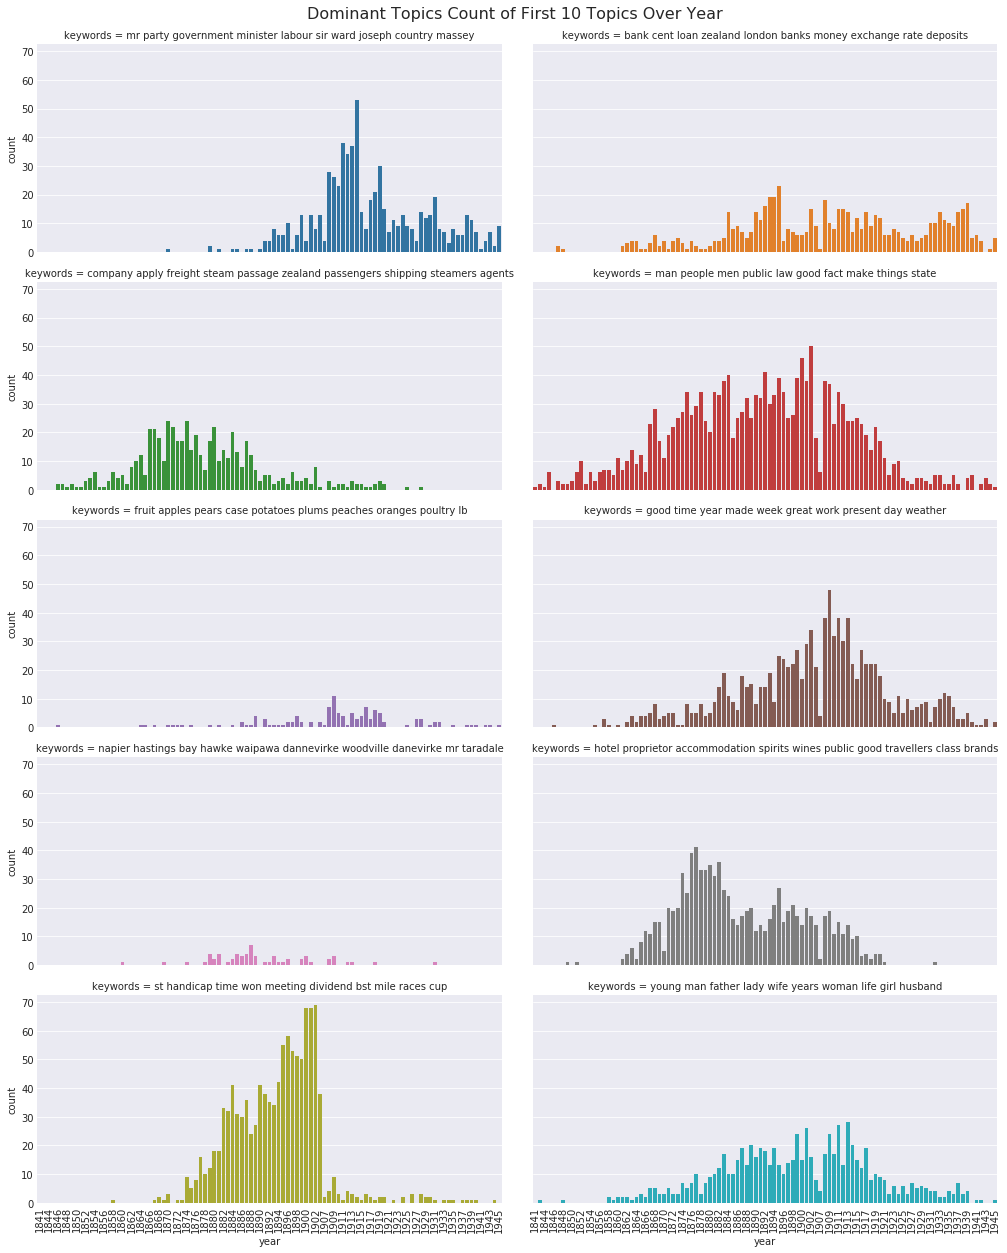

In [11]:
plot_topics(df_topics10, 
            'bar', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

**Average weight:**

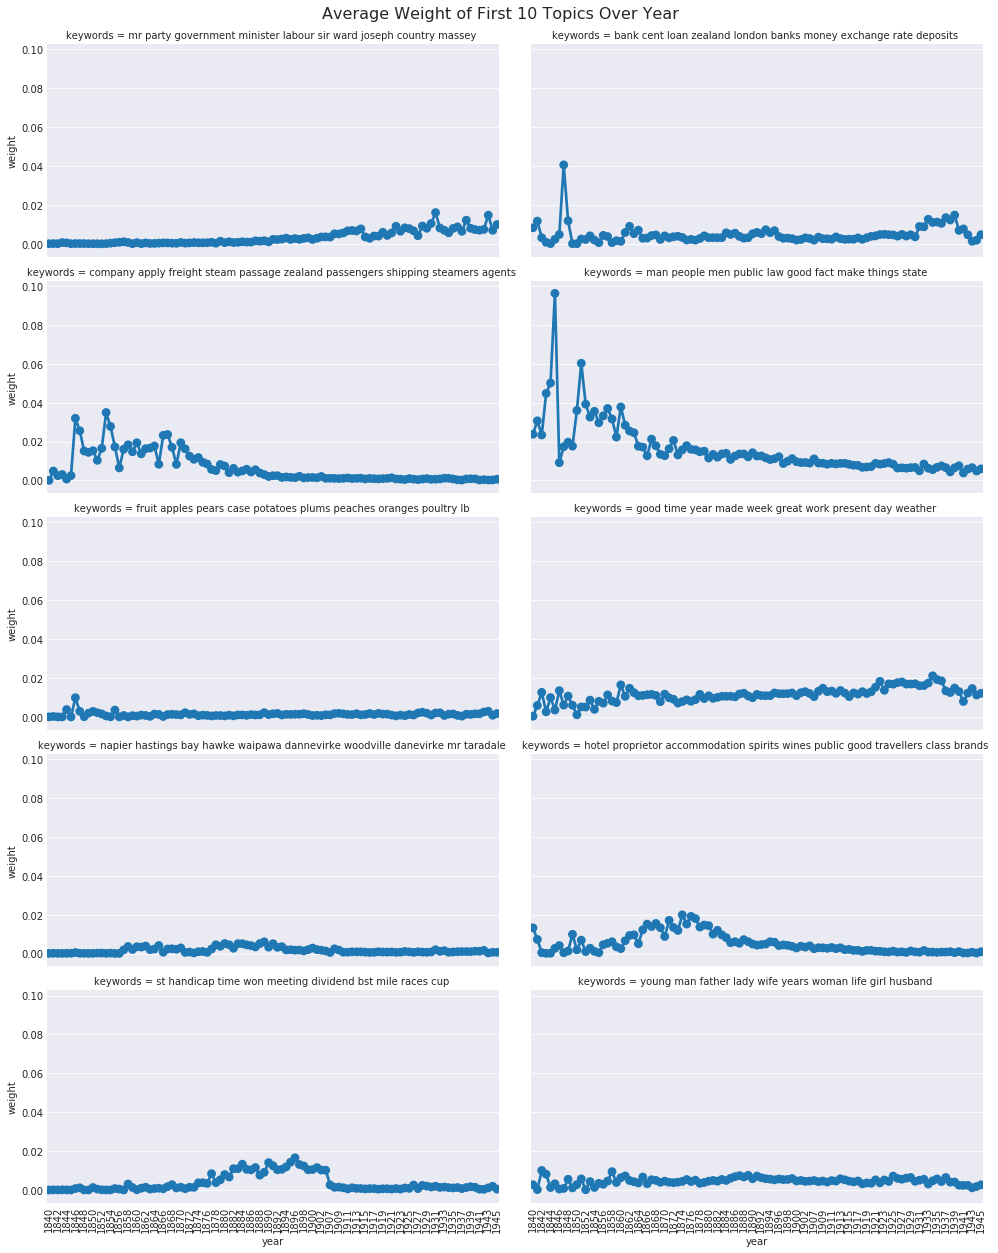

In [12]:
plot_topics(df_avgw10, 
            'point', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

### 1.3 By Specific Topics

**Here we select 4 typical topics which may vary with different era to visualize.**

* #54 strike
* #99 train
* #106 gold
* #161 german

In [13]:
topics4 = [54, 99, 106, 161]

df_topics4 = filter_topics(df_domtopic, topics4)

print('Shape of dataframe:', df_topics4.shape)
df_topics4.sample(5)

Shape of dataframe: (5612, 6)


,id,region,year,topic,weight,keywords
82155,16403655,Canterbury,1921,54,0.561376,strike union men work labour workers wages min...
96461,18302596,Wellington,1927,99,0.275748,train car railway motor road engine cars drive...
4658,2573140,Manawatu-Wanganui,1877,161,0.414660,german germany war berlin peace received franc...
121275,24857792,Bay of Plenty,1916,161,0.516676,german germany war berlin peace received franc...
136212,26858481,Northland,1910,54,0.371033,strike union men work labour workers wages min...


In [14]:
df_avgw4 = filter_topics(df_avgweight, topics4)

print('Shape of dataframe:', df_avgw4.shape)
df_avgw4.sample(5)

Shape of dataframe: (412, 4)


,year,topic,weight,keywords
3856,1855,106,0.000154,gold silver watches jewellery clocks rings jew...
161,1840,161,0.000164,german germany war berlin peace received franc...
23099,1935,99,0.009841,train car railway motor road engine cars drive...
12106,1888,106,0.001827,gold silver watches jewellery clocks rings jew...
22599,1933,99,0.008233,train car railway motor road engine cars drive...


**Dominant topics distribution:**

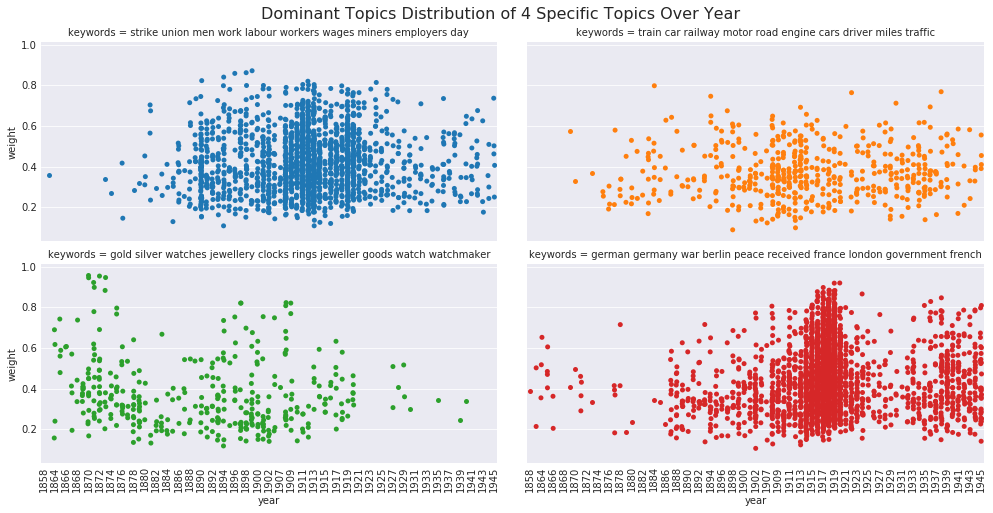

In [15]:
plot_topics(df_topics4, 
            'scatter', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)

**Dominant topics count:**

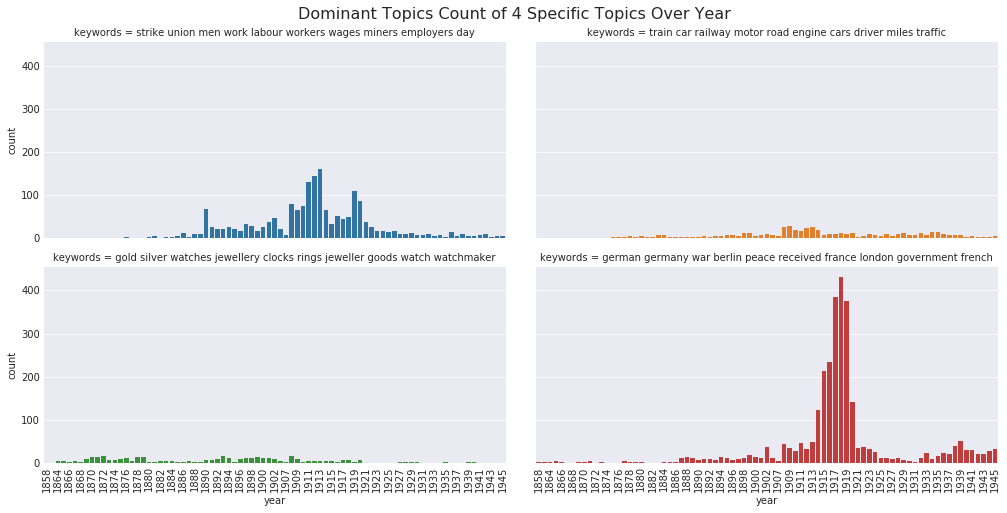

In [16]:
plot_topics(df_topics4, 
            'bar', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)

**Average weight:**

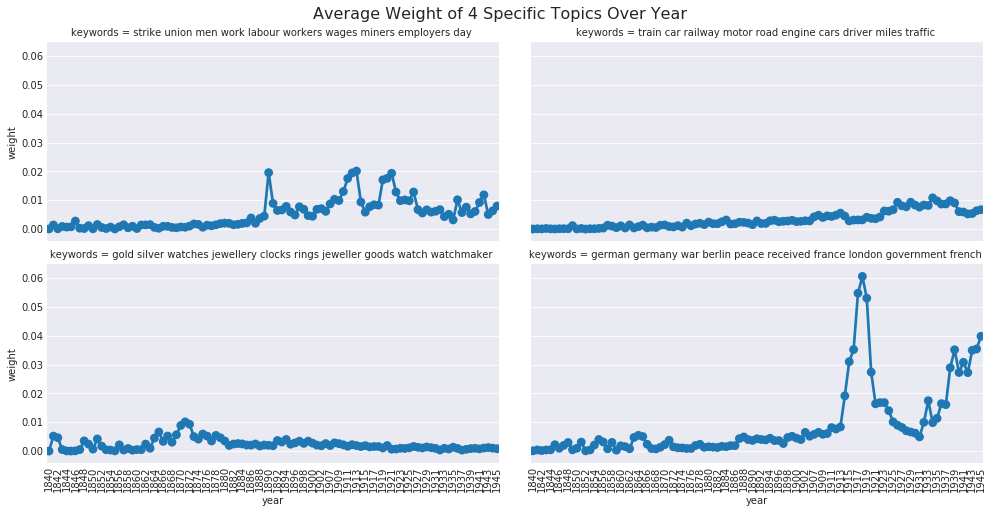

In [17]:
plot_topics(df_avgw4, 
            'point', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)